In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Security/filename.csv')


In [ ]:
data.head(2)

,Mturk_id,base_rate,phase,trial,email_type,email_id,user_action1,user_action2,user_action3,time,score,cum_score,Sender,Subject,Email,Email_type,Cluster_no
0,A100Y89FZO4J0B,75,1,1,ham,209,0,70,4,2019-06-03 13:03:00,1,1,discount@eddiebauer.com,STARTS TODAY! 40% Off Everything!,<br>Save on everything you need for your next ...,Ham,4
1,A100Y89FZO4J0B,75,2,1,phishing,159,0,60,3,2019-06-03 13:14:00,0,9,newoffers@jpmorgan.bank.com,New Mortgage Offer!,<p>Dear Loyal Customer:</p><p>&nbsp;</p><p>JP ...,Phishing,6


In [ ]:
data['Full_Text'] = data['Subject'] + " " + data['Email']
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
text_features = vectorizer.fit_transform(data['Full_Text'])

encoder = OneHotEncoder()
encoded_sender = encoder.fit_transform(data[['Sender']])

X = hstack([text_features, encoded_sender, data[['base_rate']].values])

In [ ]:
y = data['user_action1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
n_states = X_train.shape[0]
n_actions = 2
q_table = np.zeros((n_states, n_actions))

alpha = 0.1
gamma = 0.6
epsilon = 0.1


for episode in range(1000):
    state_index = np.random.randint(0, n_states)
    if np.random.rand() < epsilon:
        action = np.random.choice([0, 1])
    else:
        action = np.argmax(q_table[state_index])

    reward = 1 if action == y_train.iloc[state_index] else -1
    old_value = q_table[state_index, action]
    next_max = np.max(q_table[state_index])

    q_table[state_index, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

y_pred = []
for test_vector in X_test:
    similarities = cosine_similarity(test_vector, X_train)
    state_index = np.argmax(similarities)
    predicted_action = np.argmax(q_table[state_index])
    y_pred.append(predicted_action)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5212534059945504
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.98      0.68      1866
           1       0.72      0.04      0.08      1804

    accuracy                           0.52      3670
   macro avg       0.62      0.51      0.38      3670
weighted avg       0.62      0.52      0.38      3670



###plotting

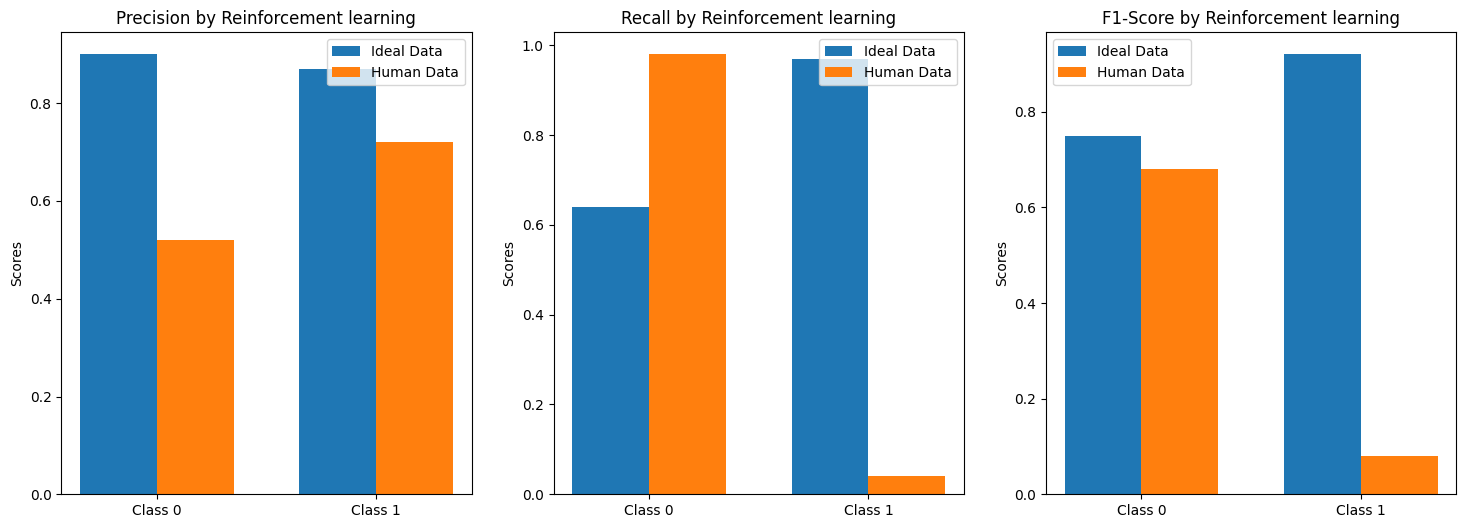

In [ ]:
metrics_idea = {'Precision': [0.90, 0.87], 'Recall': [0.64, 0.97], 'F1-Score': [0.75, 0.92]}
metrics_human = {'Precision': [0.52, 0.72], 'Recall': [0.98, 0.04], 'F1-Score': [0.68, 0.08]}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, metric in zip(axes, metrics_idea.keys()):
    ind = np.arange(len(metrics_idea[metric]))
    width = 0.35

    rects1 = ax.bar(ind - width/2, metrics_idea[metric], width, label='Ideal Data')
    rects2 = ax.bar(ind + width/2, metrics_human[metric], width, label='Human Data')

    ax.set_ylabel('Scores')
    ax.set_title(f'{metric} by Reinforcement learning')
    ax.set_xticks(ind)
    ax.set_xticklabels(('Class 0', 'Class 1'))
    ax.legend()

plt.show()

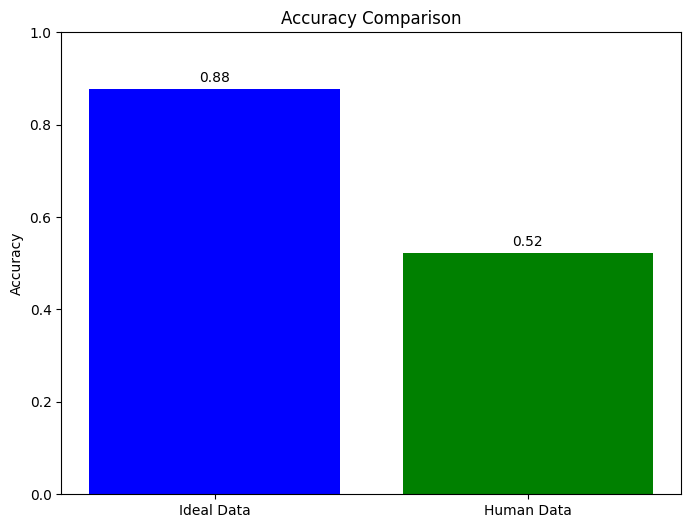

In [ ]:
import matplotlib.pyplot as plt

accuracies = [0.8775510204081632, 0.5212534059945504]
datasets = ['Ideal Data', 'Human Data']

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(datasets, accuracies, color=['blue', 'green'])

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_ylim(0, 1)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


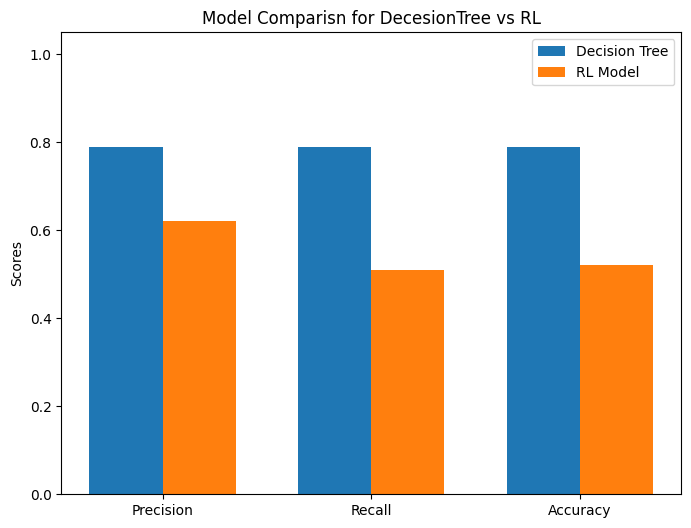

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'RL Model']
metrics = ['Precision', 'Recall', 'Accuracy']


precision_dt = 0.79
recall_dt = 0.79
accuracy_dt = 0.79


precision_rl = 0.62
recall_rl = 0.51
accuracy_rl = 0.52


data_dt = [precision_dt, recall_dt, accuracy_dt]
data_rl = [precision_rl, recall_rl, accuracy_rl]

indices = range(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(indices, data_dt, width, label='Decision Tree')
rects2 = ax.bar([i + width for i in indices], data_rl, width, label='RL Model')

ax.set_ylabel('Scores')
ax.set_title('Model Comparisn for DecesionTree vs RL')
ax.set_xticks([i + width / 2 for i in indices])
ax.set_xticklabels(['Precision', 'Recall', 'Accuracy'])
ax.legend()

ax.set_ylim(0, 1.05)

plt.show()